# OIBSIP Task 3: Email Spam Detection using ML

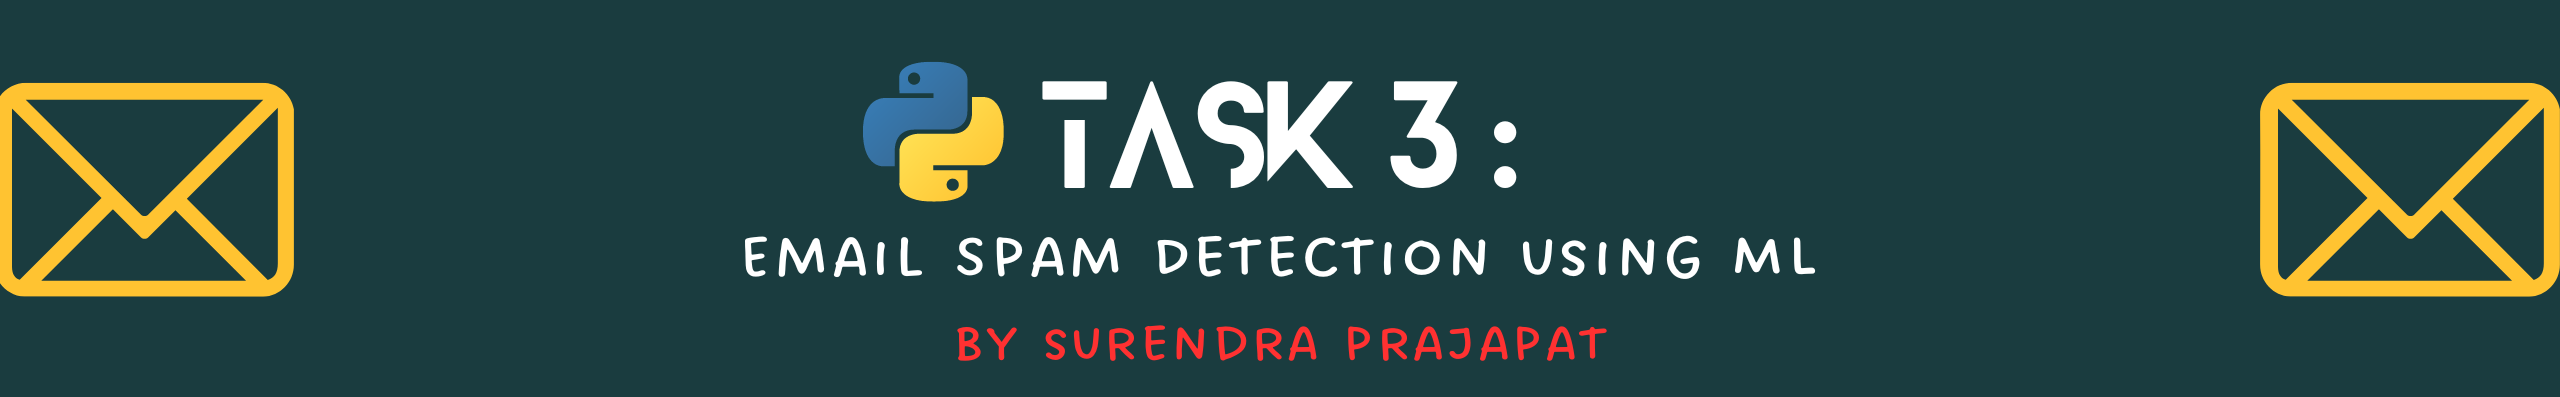

In [62]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

In [63]:
data = pd.read_csv("/content/Spam.csv")

In [64]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [65]:
data.shape

(5572, 2)

In [66]:
# Statistical measurment for dataset
data.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [67]:
# checking null value present or not 
data.isnull().sum()

Category    0
Message     0
dtype: int64

In [68]:
# spam mail = 0 and ham mail = 1
data.loc[data['Category']=='spam', "Category",]=0
data.loc[data['Category']=='ham', "Category",]=1

In [69]:
data

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...
5568,1,Will ü b going to esplanade fr home?
5569,1,"Pity, * was in mood for that. So...any other s..."
5570,1,The guy did some bitching but I acted like i'd...


In [70]:
x = data['Message']
y = data['Category']

In [71]:
print(x)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [72]:
print(y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


In [73]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)

In [74]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(4457,) (1115,) (4457,) (1115,)


In [75]:
print(x_train)

3075                  Don know. I did't msg him recently.
1787    Do you know why god created gap between your f...
1614                         Thnx dude. u guys out 2nite?
4304                                      Yup i'm free...
3266    44 7732584351, Do you want a New Nokia 3510i c...
                              ...                        
789     5 Free Top Polyphonic Tones call 087018728737,...
968     What do u want when i come back?.a beautiful n...
1667    Guess who spent all last night phasing in and ...
3321    Eh sorry leh... I din c ur msg. Not sad alread...
1688    Free Top ringtone -sub to weekly ringtone-get ...
Name: Message, Length: 4457, dtype: object


In [76]:
print(y_train)

3075    1
1787    1
1614    1
4304    1
3266    0
       ..
789     0
968     1
1667    1
3321    1
1688    0
Name: Category, Length: 4457, dtype: object


Feature Extraction

In [77]:
feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english')

x_train_features = feature_extraction.fit_transform(x_train)
x_test_features  = feature_extraction.transform(x_test)

# converting y_train and y_test values as integers
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [78]:
print(x_train_features)

  (0, 5413)	0.6198254967574347
  (0, 4456)	0.4168658090846482
  (0, 2224)	0.413103377943378
  (0, 3811)	0.34780165336891333
  (0, 2329)	0.38783870336935383
  (1, 4080)	0.18880584110891163
  (1, 3185)	0.29694482957694585
  (1, 3325)	0.31610586766078863
  (1, 2957)	0.3398297002864083
  (1, 2746)	0.3398297002864083
  (1, 918)	0.22871581159877646
  (1, 1839)	0.2784903590561455
  (1, 2758)	0.3226407885943799
  (1, 2956)	0.33036995955537024
  (1, 1991)	0.33036995955537024
  (1, 3046)	0.2503712792613518
  (1, 3811)	0.17419952275504033
  (2, 407)	0.509272536051008
  (2, 3156)	0.4107239318312698
  (2, 2404)	0.45287711070606745
  (2, 6601)	0.6056811524587518
  (3, 2870)	0.5864269879324768
  (3, 7414)	0.8100020912469564
  (4, 50)	0.23633754072626942
  (4, 5497)	0.15743785051118356
  :	:
  (4454, 4602)	0.2669765732445391
  (4454, 3142)	0.32014451677763156
  (4455, 2247)	0.37052851863170466
  (4455, 2469)	0.35441545511837946
  (4455, 5646)	0.33545678464631296
  (4455, 6810)	0.29731757715898277
  (4

Logistic Regression

In [79]:
model = LogisticRegression()

In [80]:
model.fit(x_train_features, y_train)

LogisticRegression()

Evolution Model 

In [82]:
prediction_on_training_data = model.predict(x_train_features)
accuracy_score_training_data = accuracy_score(y_train, prediction_on_training_data)

In [88]:
print("Accuracy score of training data:", round(accuracy_score_training_data*100, 2))

Accuracy score of training data: 96.7


In [84]:
prediction_on_test_data = model.predict(x_test_features)
accuracy_score_test_data = accuracy_score(y_test, prediction_on_test_data)

In [87]:
print("Accuracy score of test data:", round(accuracy_score_test_data*100, 2))

Accuracy score of test data: 96.59


In [93]:
input_mail = ["Havent planning to buy later. I check already lido only got 530 show in e afternoon. U finish work already?"]

# converting text into feature vectore 
input_data_features = feature_extraction.transform(input_mail)

prediction = model.predict(input_data_features)
print(prediction)

if prediction[0] == 0:
  print("This mail is Spam mail")
else:
  print("This mail is Ham mail")

[1]
This mail is Ham mail
